# Support Vector Machines
### Overview
Support Vector Machines (SVMs) are powerful supervised machine learning algorithms used primarily for classification and regression tasks. They are effective in high-dimensional spaces, even when the number of dimensions exceeds the number of samples, memory efficient, versatile, can handle non linearity, and are robust against overfitting.

SVMs can be used for binary classification, multi-class classification, regression, outlier detection.
### Dataset
The Gene Expression datasets are particularly suitable as they're classic examples of the "small n, large p" problem in bioinformatics that SVMs were often designed to address. The high-dimensional nature of genomic data with relatively few patient samples makes them ideal candidates for SVM analysis.

### Analysis
BRCA: Breast Invasive Carcinoma - a form of breast cancer
LUAD: Lung Adenocarcinoma - a common type of non-small cell lung cancer
KIRC: Kidney Renal Clear Cell Carcinoma - a type of kidney cancer
COAD: Colon Adenocarcinoma - a form of colon cancer
PRAD: Prostate Adenocarcinoma - a type of prostate cancer

These are cancer type abbreviations commonly used in genomics research, particularly in The Cancer Genome Atlas (TCGA) project. Each abbreviation represents a specific type of cancer:

In the context of our gene expression cancer RNA-seq dataset, these labels represent the different types of cancer being studied. The RNA-seq data contains gene expression profiles (measurements of RNA levels for thousands of genes) from tumor samples of these five different cancer types.
Our SVM model is being trained to distinguish between these cancer types based on their gene expression patterns. This is a common application in cancer genomics - using machine learning to classify cancer types or subtypes based on their molecular profiles, which can have implications for diagnosis, prognosis, and potentially treatment selection.

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

In [2]:
cell_data = pd.read_csv('cell_data.csv')
cell_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
cell_data.isna().sum().sum()

0

In [4]:
X = cell_data.iloc[:,1:]

In [5]:
X

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [6]:
cell_label = pd.read_csv('cell_label.csv')
cell_label.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [7]:
cell_label.isna().sum().sum()

0

In [8]:
cell_label["Class"].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [9]:
labels = cell_label['Class']
# Convert labels to numeric if they're categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
    
# Store original label names for later reference
label_names = label_encoder.classes_

In [10]:
def train_and_evaluate_svm_no_reduction(X, y):
    """
    Train SVM model directly on all features without dimensionality reduction
    """
    print("Starting SVM training without dimensionality reduction...")
    print(f"Input data shape: {X.shape}")
    start_time = time.time()
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=100, stratify=y
    )
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Use LinearSVC which is more efficient for high-dimensional data
    # Note: We use dual=False which is more efficient when n_samples > n_features
    # But for gene expression data, we typically have n_features > n_samples, so we keep dual=True
    svm = LinearSVC(
        penalty='l2',
        loss='squared_hinge',
        dual=True,
        tol=1e-4,
        C=1.0,
        max_iter=5000,
        random_state=42
    )
    
    # Define parameter grid for grid search
    # Keep it minimal due to computational constraints
    param_grid = {
        'C': [0.1, 1.0, 10.0]
    }
    
    print("Starting grid search...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
    grid_search = GridSearchCV(
        svm, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1
    )
    
    # Train the model
    grid_search.fit(X_train_scaled, y_train)
    
    # Get best model
    best_svm = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    
    # Evaluate on test set
    y_pred = best_svm.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate training time
    training_time = time.time() - start_time
    print(f"Total training and evaluation time: {training_time:.2f} seconds")
    
    return best_svm, cm, y_test, y_pred

def visualize_confusion_matrix(cm, label_names):
    """
    Visualize confusion matrix
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()  # Display the plot instead of saving it

Training SVM on all features...
Starting SVM training without dimensionality reduction...
Input data shape: (801, 20531)
Starting grid search...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'C': 0.1}
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        27

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Total training and evaluation time: 70.21 seconds


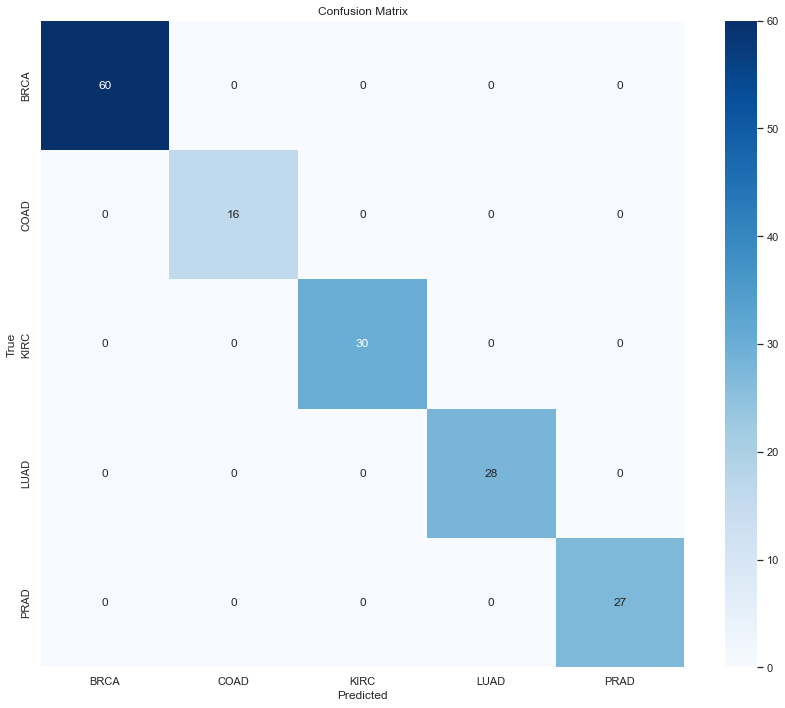


Per-class Metrics:
  Class  Precision  Recall  F1-Score
0  BRCA        1.0     1.0       1.0
1  COAD        1.0     1.0       1.0
2  KIRC        1.0     1.0       1.0
3  LUAD        1.0     1.0       1.0
4  PRAD        1.0     1.0       1.0


In [11]:
# Train and evaluate SVM without dimensionality reduction
print("Training SVM on all features...")
best_svm, cm, y_test, y_pred = train_and_evaluate_svm_no_reduction(X, y)

# Visualize confusion matrix
visualize_confusion_matrix(cm, label_names)

# Calculate per-class metrics
print("\nPer-class Metrics:")
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

class_metrics = pd.DataFrame({
    'Class': label_names,
    'Precision': precision,
    'Recall': recall, 
    'F1-Score': f1
})

print(class_metrics)

### Conclusion 
Extracting 20,000+ features from a sample is indeed standard practice in RNA-seq studies. Modern RNA sequencing technology can measure the expression levels of essentially all genes in the human genome (approximately 20,000-25,000 protein-coding genes). Each feature represents the expression level of a specific gene, measured as the number or normalized count of RNA transcripts detected.

Cancer types are molecularly distinct: The five cancer types in your dataset (BRCA, LUAD, KIRC, COAD, PRAD) originate from different organs and have very distinct molecular signatures. Strong biological differences make them relatively easy to separate.